# 02. Neural Network classification with PyTorch


Classification is a problem of predicting whether something is one thing or another(there can be multiple things as the options).

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples = 1000


# Create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 sample of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 sample of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:, 1],
                        "label":y,
                       })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


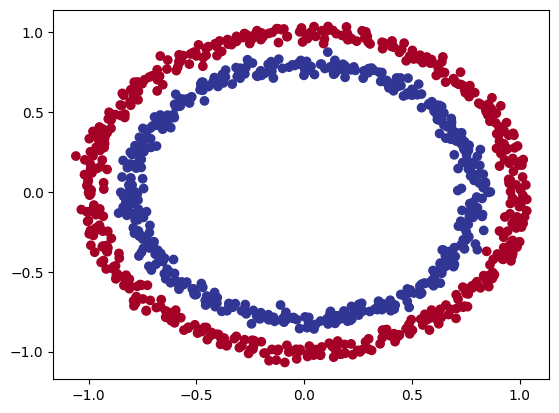

In [ ]:
#Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu
            )

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sampe of X: {X_sample.shape}, and the same for y: {y_sample.shape}")


Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sampe of X: (2,), and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.33,
                                                 random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train), len(y_test)

(670, 330, 670, 330)

## 2. Building a model

Let's build a model to classify our blue and red dots.

TO do so, we want to:

1. Setup device agnostic code so our code will run on accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3.Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Now we've setup device agnostic code, let's create a model that

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. Construct a model that subclass nn.Module
class CircleModelVO(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer1 = nn.Linear(in_features=2, out_features = 5) # takes in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outpurs a single feature(same shape as y)

  # 3. Define a forward() method that outline the forward pass
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelVO().to(device)
model_0

CircleModelVO(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# let's replicate the model using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features = 2,out_features = 5),
    nn.Linear(in_features=5, out_features = 1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
#Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)}, Shape: {X_test.shape}")

print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 Labels:\n{y_test[:10]}")

Length of prediction: 330, Shape: torch.Size([330, 1])
Length of test samples:330, Shape: torch.Size([330, 2])

 First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

 First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use

Again... this is problem specific.

For example for regression you might want MAE or MSE(mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy(cross entropy).

As a reminder, the loss function measure how *wrong* your model predictions are

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.



*For the loss funtion we're going to use `torch.nn.BECWithLogitsLoss()`

* For different optimizer see `torch.optim`

In [ ]:
# Set up the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss


# BCELoss() will be equivalent to BCEWithLogitsLoss() if we add below line
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in


optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr = 0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
#Calculate accuracy - out of 100 examples waht percentage does our model get right


In [28]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model, we're going to nedd to buld a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probablities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation funtion (e.g. sigmoid for binary classification and softmax for multiclass classification)


Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [ ]:
# View the first outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Uset the sigmoid activation function on our logits to turn them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs`>= 0.5 , `y=1` (class 1)
* `y_pred_probs`< 0.5, y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_lables = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_lables.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device

X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building trainin g and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  ## 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_pred,y_train)  # nn.BCEWithLogitsLoss expect raw logits as input
  acc = accuracy_fn(y_true = y_train,
                    y_pred= y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)

    ## Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}% , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}%, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 10 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 20 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 30 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 40 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 50 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 60 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 70 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 80 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%
Epoch: 90 | Loss: 0.76189% , Acc: 52.84% | Test loss: 0.69775%, Test acc: 53.33%


## Make predictions and evaluate the model

from the metrics it looks like our model isn't learning anything ....

So to inspect it let's make some prediction and make them visual!

In other words visualize


To do so we're going to import a function called `plot_decisoion_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [27]:
import requests
from pathlib import Path

# Download helper functions from learn Pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper function.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary


Download helper_functions.py


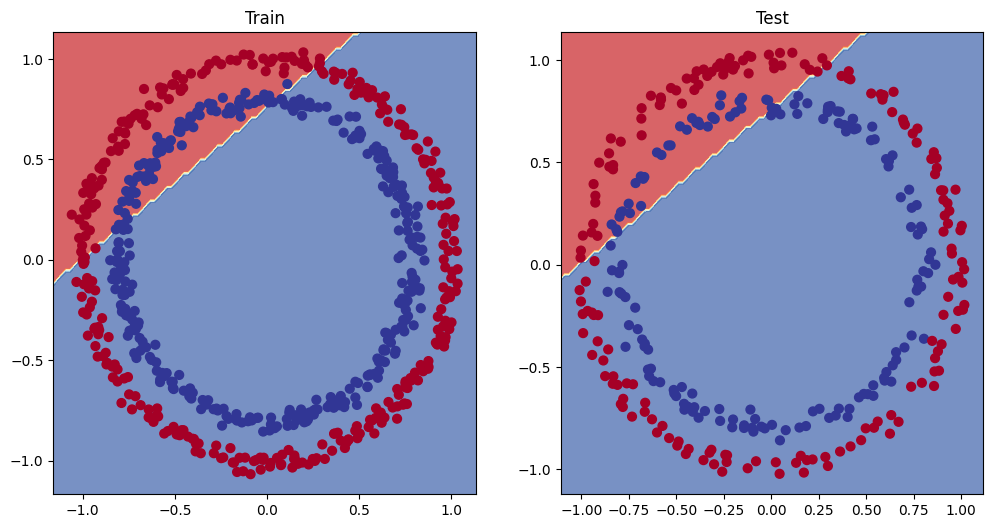

In [ ]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model (from a model perspective)

* Add more layers - give the model more chance to learn about patterns in the data
* Add more hidden unit - go from 5 hidden units to 10 hidden unit
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function


These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as ml engineer and data scientists) can change, they are referred as `hyperparameters`


Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operation leverages speed ups where possible behind the scenes


model_1 = CircleModelV1().to(device)
model_1




CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss funciton
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)


In [ ]:
# Writing a training and testing loop for model1
epochs = 1000


# Put data on the target device
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilites -> predition labels


  #2. Calculate loss and accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true = y_train,
                 y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropogation
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caluclate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)

    # Print out what's happening
    if epoch%100 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}%, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}%, Test accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69355%, Acc: 51.34% | Test loss: 0.69397%, Test accuracy: 49.70%
Epoch: 100 | Loss: 0.69323%, Acc: 51.64% | Test loss: 0.69455%, Test accuracy: 52.42%
Epoch: 200 | Loss: 0.69303%, Acc: 53.43% | Test loss: 0.69493%, Test accuracy: 52.12%
Epoch: 300 | Loss: 0.69289%, Acc: 55.37% | Test loss: 0.69519%, Test accuracy: 53.33%
Epoch: 400 | Loss: 0.69278%, Acc: 60.60% | Test loss: 0.69538%, Test accuracy: 54.85%
Epoch: 500 | Loss: 0.69270%, Acc: 58.66% | Test loss: 0.69554%, Test accuracy: 51.82%
Epoch: 600 | Loss: 0.69263%, Acc: 56.42% | Test loss: 0.69567%, Test accuracy: 49.39%
Epoch: 700 | Loss: 0.69258%, Acc: 53.43% | Test loss: 0.69579%, Test accuracy: 48.18%
Epoch: 800 | Loss: 0.69254%, Acc: 54.63% | Test loss: 0.69590%, Test accuracy: 48.18%
Epoch: 900 | Loss: 0.69251%, Acc: 55.52% | Test loss: 0.69600%, Test accuracy: 49.70%


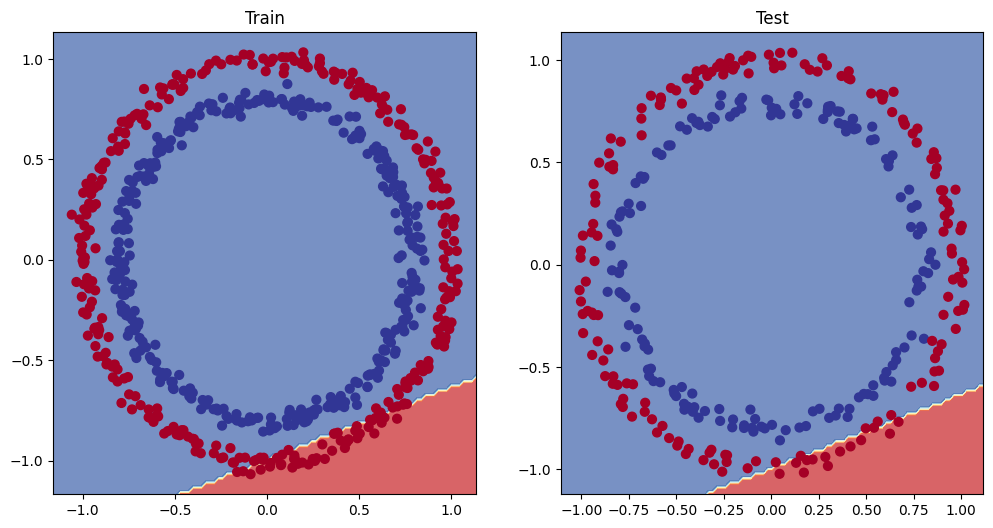

In [ ]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test a smaller problem

In [ ]:
# Create some data (same as note 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create a train and test split

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


# Check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

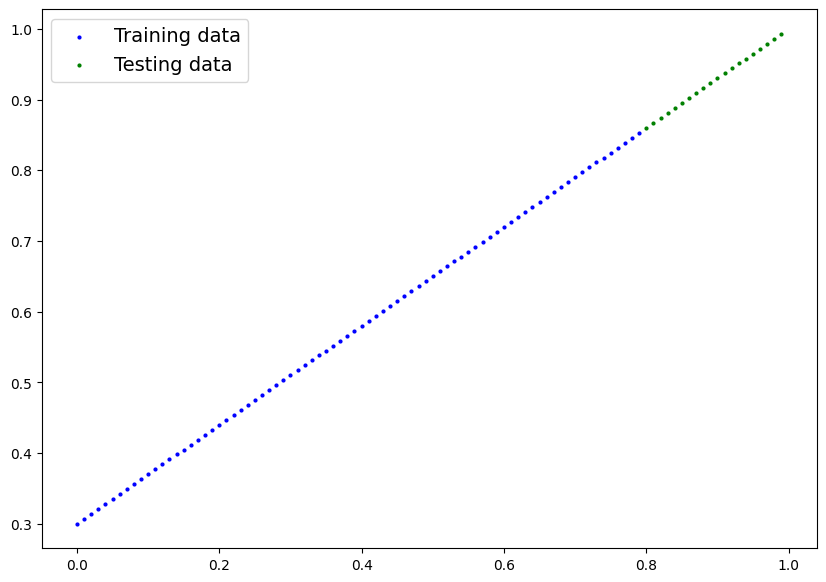

In [ ]:
plot_predictions(train_data = X_train_regression,
                train_labels = y_train_regression,
                test_data = X_test_regression,
                test_labels = y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same achitecture as model_1 (but using nn.Sequential() )

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features =1 )
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_2.parameters(),lr=0.001)



In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression , y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#Training
for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch %100==0:
    print(f'Epoch:{epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}')


Epoch:0 | Loss: 0.75986 | Test loss: 0.94965
Epoch:100 | Loss: 0.40272 | Test loss: 0.54029
Epoch:200 | Loss: 0.05876 | Test loss: 0.13480
Epoch:300 | Loss: 0.01461 | Test loss: 0.03342
Epoch:400 | Loss: 0.00308 | Test loss: 0.00008
Epoch:500 | Loss: 0.00309 | Test loss: 0.00012
Epoch:600 | Loss: 0.00309 | Test loss: 0.00018
Epoch:700 | Loss: 0.00299 | Test loss: 0.00011
Epoch:800 | Loss: 0.00299 | Test loss: 0.00016
Epoch:900 | Loss: 0.00289 | Test loss: 0.00011


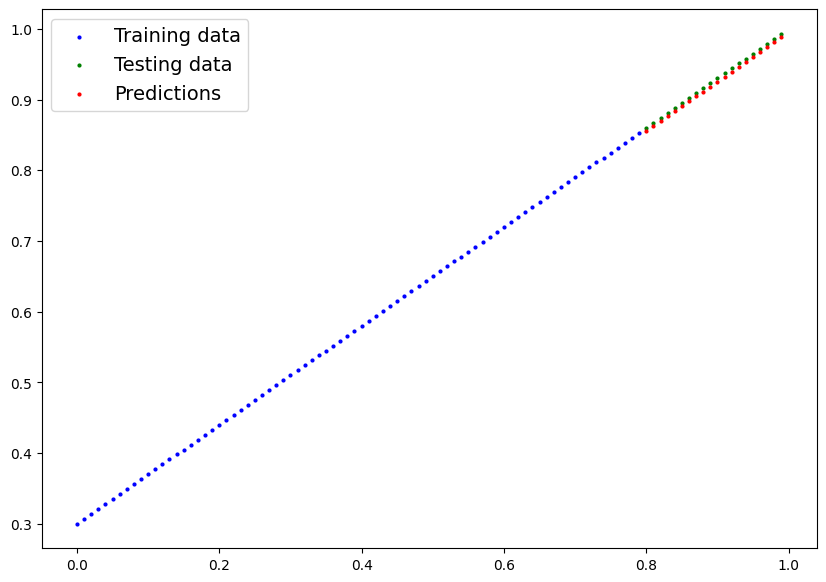

In [ ]:
model_2.eval()
with torch.inference_mode():
  test_pred = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                train_labels = y_train_regression.cpu(),
                test_data = X_test_regression.cpu(),
                test_labels = y_test_regression.cpu(),
                predictions = test_pred.cpu()
                );


### 6. The missing piece: non-linearity

"What patterns could you draw if you were given an ifinite amount of a straight and non-straight line?"

Or in Machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1  Recreating non-linear (red and blue circles)

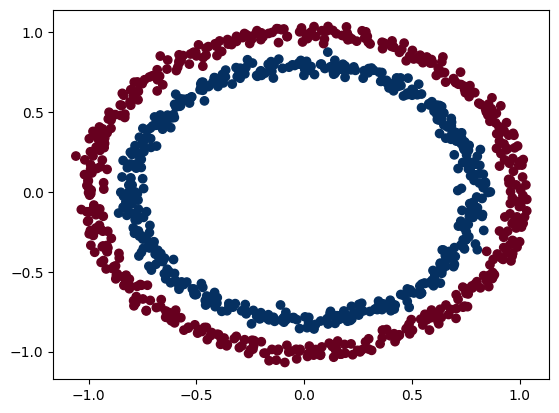

In [ ]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdBu)

In [ ]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

## Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 6.2 Building a model with non-linearity

* Linear = straight line
* Non-linear = non-straight line

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [ ]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=20)
    self.layer_2 = nn.Linear(in_features=20, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function


  def forward(self, x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.08)


#### 6.3 Training a model with non linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Loop through data
epochs = 2000

for epoch in range(epochs):
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (take in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred= y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  #### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred= test_pred)

  #Print out what's happening
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} %, Acc:{acc:.2f} % | Test Loss: {test_loss:.4f} % , Test Acc: {test_acc:.2f} %")

Epoch: 0 | Loss: 0.6948 %, Acc:43.88 % | Test Loss: 0.6952 % , Test Acc: 46.50 %
Epoch: 100 | Loss: 0.6917 %, Acc:52.12 % | Test Loss: 0.6925 % , Test Acc: 49.50 %
Epoch: 200 | Loss: 0.6899 %, Acc:52.75 % | Test Loss: 0.6904 % , Test Acc: 49.50 %
Epoch: 300 | Loss: 0.6877 %, Acc:57.25 % | Test Loss: 0.6879 % , Test Acc: 57.50 %
Epoch: 400 | Loss: 0.6846 %, Acc:61.38 % | Test Loss: 0.6845 % , Test Acc: 65.00 %
Epoch: 500 | Loss: 0.6792 %, Acc:67.00 % | Test Loss: 0.6792 % , Test Acc: 69.00 %
Epoch: 600 | Loss: 0.6705 %, Acc:68.62 % | Test Loss: 0.6710 % , Test Acc: 72.50 %
Epoch: 700 | Loss: 0.6556 %, Acc:74.50 % | Test Loss: 0.6577 % , Test Acc: 76.50 %
Epoch: 800 | Loss: 0.6279 %, Acc:87.25 % | Test Loss: 0.6340 % , Test Acc: 89.50 %
Epoch: 900 | Loss: 0.5766 %, Acc:94.12 % | Test Loss: 0.5903 % , Test Acc: 91.50 %
Epoch: 1000 | Loss: 0.4891 %, Acc:97.75 % | Test Loss: 0.5127 % , Test Acc: 97.00 %
Epoch: 1100 | Loss: 0.3649 %, Acc:99.00 % | Test Loss: 0.3976 % , Test Acc: 99.00 %
Epoc

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

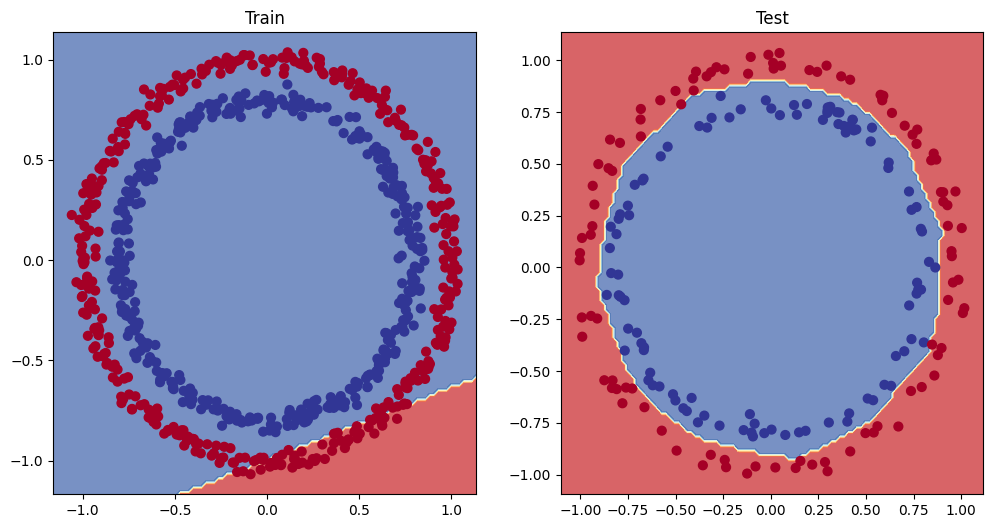

In [ ]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train) # model_1 = no non linearity

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test) # model_3 has linearity

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools
to discover patterns in data  and it tries to figure out the pattern on its own

And thes tools are linear & non-linear Functions

In [ ]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

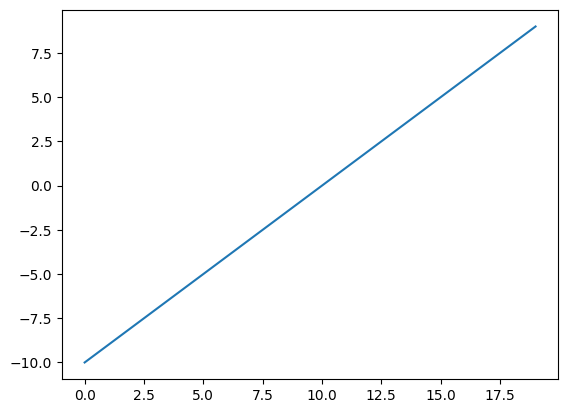

In [ ]:
# Visualize the tensor
plt.plot(A)

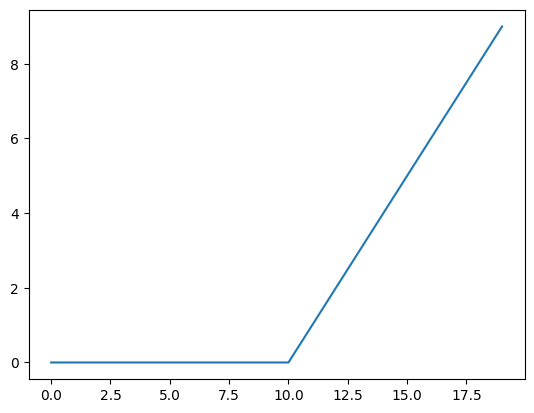

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

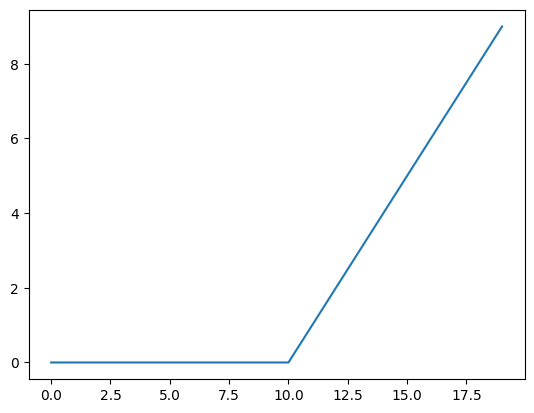

In [ ]:
plt.plot(relu(A))

In [ ]:
# Now let's do the same for sigmoid
def sigmoid(x : torch.Tensor):
  return 1/(1+torch.exp(-x))


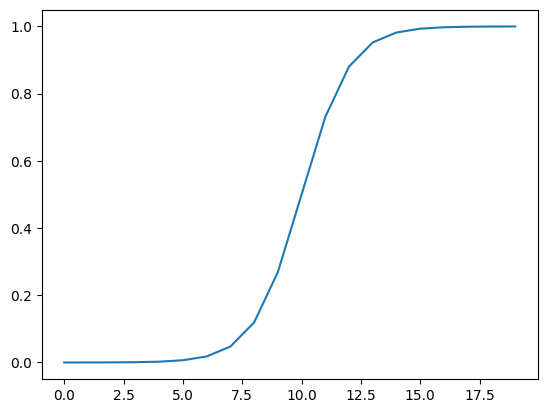

In [ ]:
plt.plot(torch.sigmoid(A))

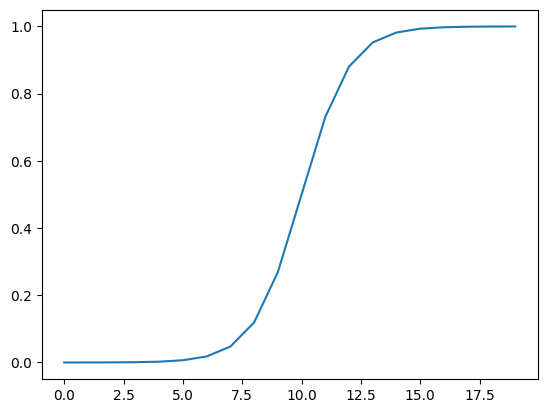

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classfication problem

* Binary Classification = one thing or another (cat vs dog, spam vs not spam, fraud vs non fraud)
* Multi Class Classification = more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset

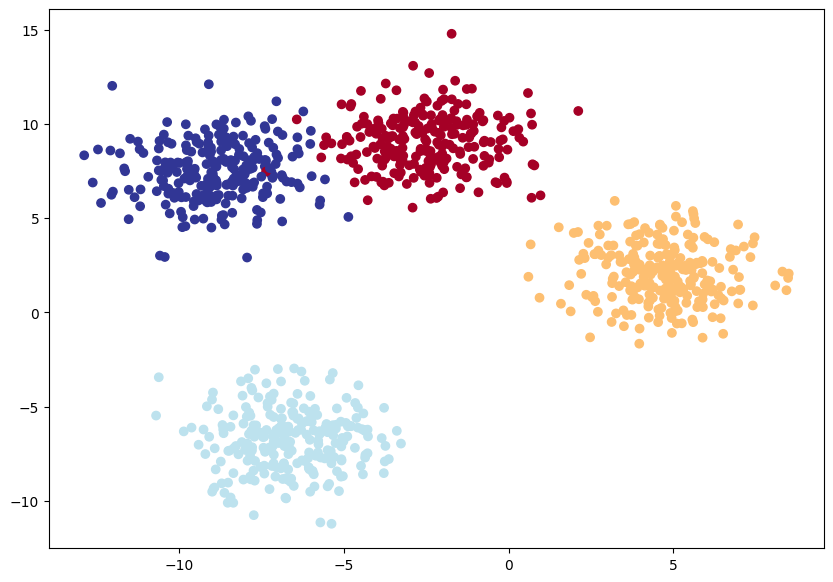

In [14]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn


# Set the hyperparameter for data classification

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap = plt.cm.RdYlBu);

### 8.2 Building a multi-classification model in Pytorch

In [15]:
# Create a device agonistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [43]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initialize multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of outputs features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Examples:
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features = 2,
                     output_features = 4,
                    hidden_units=8).to(device)

In [44]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [45]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [46]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and optimizer

In [47]:
# Create a loss function for multi-class classification - loss function measures how wrong our model predictions are
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params= model_4.parameters(),
                            lr=0.1)  # learning rate is hyperparameter you can change

### 8.4 Getting prediction probabilites for a mult-class PyTorch model


In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to predictio probabilites and then to prediction labels

Logits(raw output of the model) -> Pred probs (use torch.softmax) -> Pred labels (take the argmax of the prediction probabilities)


In [48]:
# let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [49]:
# Convert our model's logit outputs to prediction probabilite
y_pred_probs = torch.softmax(y_logits,dim=1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [50]:
torch.max(y_pred_probs[0])

tensor(0.3715)

In [51]:
torch.argmax(y_pred_probs[0])

tensor(3)

In [52]:
# Convert our model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

### 8.5 Creating a training loop and testing loop for a mult-class Pytorch model

In [53]:
# Fit the multi-class Mode to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
#Loop through data
for epoch in range(epochs):
  #Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc= accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                                y_pred= test_preds)

    # Print out what's happening
    if epoch % 10 ==0:
      print(f"Epoch : {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")

Epoch : 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.5786, Test acc: 95.50
Epoch : 10 | Loss: 0.1440, Acc: 99.12% | Test loss: 0.1304, Test acc: 99.00
Epoch : 20 | Loss: 0.0806, Acc: 99.12% | Test loss: 0.0722, Test acc: 99.50
Epoch : 30 | Loss: 0.0592, Acc: 99.12% | Test loss: 0.0513, Test acc: 99.50
Epoch : 40 | Loss: 0.0489, Acc: 99.00% | Test loss: 0.0410, Test acc: 99.50
Epoch : 50 | Loss: 0.0429, Acc: 99.00% | Test loss: 0.0349, Test acc: 99.50
Epoch : 60 | Loss: 0.0391, Acc: 99.00% | Test loss: 0.0308, Test acc: 99.50
Epoch : 70 | Loss: 0.0364, Acc: 99.00% | Test loss: 0.0280, Test acc: 99.50
Epoch : 80 | Loss: 0.0345, Acc: 99.00% | Test loss: 0.0259, Test acc: 99.50
Epoch : 90 | Loss: 0.0330, Acc: 99.12% | Test loss: 0.0242, Test acc: 99.50


### 8.6 Making and evaluating predictions with a Pytorch multi-class model

In [54]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first  10 prediction
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [55]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_preds = torch.argmax(y_pred_probs,dim=1)

In [56]:
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [57]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

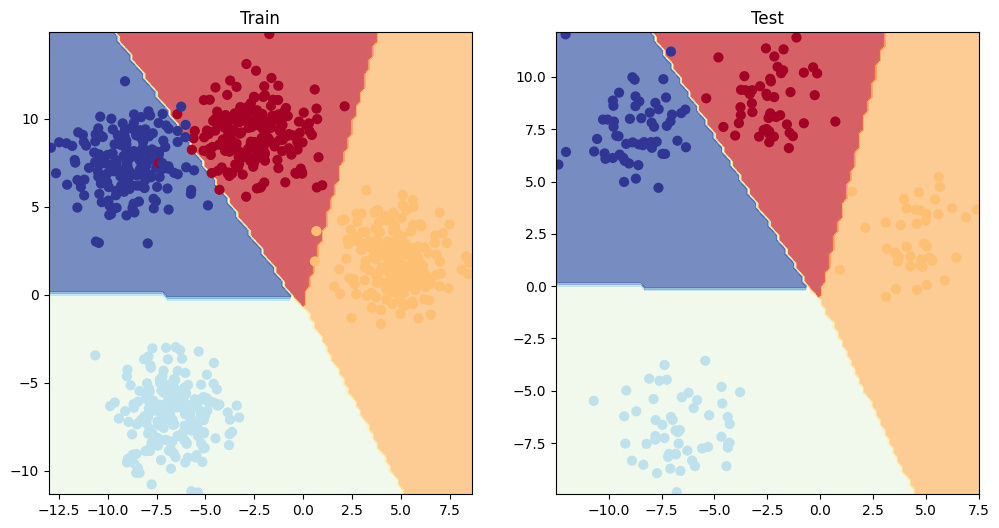

In [58]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test, y_blob_test)

## 9. A few more classification metrics ... to (evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?

* Precision
* Recall
* F1 - score
* Confusion matrix
* Classification report

In [61]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [66]:
from torchmetrics import Accuracy

#setup metric
torchmetric_accuracy = Accuracy(task='multiclass',num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)